In [5]:
# RAHMADI RIDWAN
# ridwan@blast.co.id

import numpy as np
import pandas as pd

# Data yang digunakan berupa dataset Global Climate Change Data di https://data.world/data-society/global-climate-change-data
# yang memiliki jumlah baris data sebanyak < 240000 

In [4]:
df = pd.read_csv('https://query.data.world/s/tu7xkafdc4jbuzmuh5zxqaeshwj7sv', encoding= 'unicode_escape')
df

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,CÃ´te D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,CÃ´te D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,CÃ´te D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,CÃ´te D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,CÃ´te D'Ivoire,5.63N,3.23W
...,...,...,...,...,...,...,...
239172,2013-05-01,18.979,0.807,Xian,China,34.56N,108.97E
239173,2013-06-01,23.522,0.647,Xian,China,34.56N,108.97E
239174,2013-07-01,25.251,1.042,Xian,China,34.56N,108.97E
239175,2013-08-01,24.528,0.840,Xian,China,34.56N,108.97E


In [6]:
# drop kolom atribut kota dan koordinat lintang bujur

df = df.drop(columns=['City','Latitude','Longitude'])
df

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1849-01-01,26.704,1.435,CÃ´te D'Ivoire
1,1849-02-01,27.434,1.362,CÃ´te D'Ivoire
2,1849-03-01,28.101,1.612,CÃ´te D'Ivoire
3,1849-04-01,26.140,1.387,CÃ´te D'Ivoire
4,1849-05-01,25.427,1.200,CÃ´te D'Ivoire
...,...,...,...,...
239172,2013-05-01,18.979,0.807,China
239173,2013-06-01,23.522,0.647,China
239174,2013-07-01,25.251,1.042,China
239175,2013-08-01,24.528,0.840,China


In [7]:
# konversi elemen di kolom atribut 'dt' menjadi tipe data date-time
# seleksi data yang dari batasan awal tahun 1950 hingga akhir tahun 2009

df['dt'] = pd.to_datetime(df['dt'])  
ambil_data = (df['dt'] > '1950-01-01') & (df['dt'] <= '2009-12-25')
df = df.loc[ambil_data]
df

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
1213,1950-02-01,27.527,0.348,CÃ´te D'Ivoire
1214,1950-03-01,28.344,0.431,CÃ´te D'Ivoire
1215,1950-04-01,27.830,0.467,CÃ´te D'Ivoire
1216,1950-05-01,26.896,0.248,CÃ´te D'Ivoire
1217,1950-06-01,25.454,0.209,CÃ´te D'Ivoire
...,...,...,...,...
239127,2009-08-01,22.429,0.300,China
239128,2009-09-01,18.459,0.374,China
239129,2009-10-01,14.195,0.163,China
239130,2009-11-01,2.916,0.675,China


In [8]:
# data time series yang diambil hanya diseleksi untuk yang negara China

df = df.loc[df['Country'] == 'China']
df

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
48592,1950-02-01,-11.725,0.637,China
48593,1950-03-01,-2.115,0.270,China
48594,1950-04-01,8.921,0.411,China
48595,1950-05-01,15.493,0.303,China
48596,1950-06-01,20.400,0.338,China
...,...,...,...,...
239127,2009-08-01,22.429,0.300,China
239128,2009-09-01,18.459,0.374,China
239129,2009-10-01,14.195,0.163,China
239130,2009-11-01,2.916,0.675,China


In [9]:
df.drop(['Country'], axis=1, inplace=True)
df.reset_index(drop=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,dt,AverageTemperature,AverageTemperatureUncertainty
0,1950-02-01,-11.725,0.637
1,1950-03-01,-2.115,0.270
2,1950-04-01,8.921,0.411
3,1950-05-01,15.493,0.303
4,1950-06-01,20.400,0.338
...,...,...,...
11499,2009-08-01,22.429,0.300
11500,2009-09-01,18.459,0.374
11501,2009-10-01,14.195,0.163
11502,2009-11-01,2.916,0.675


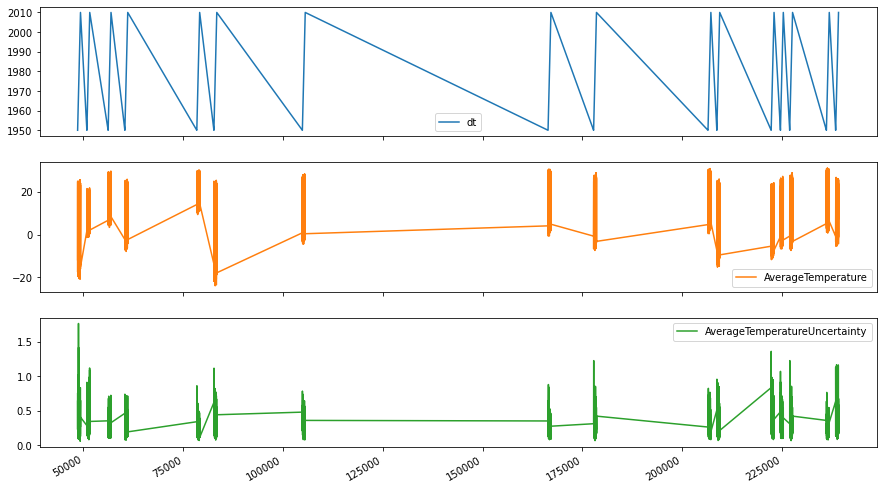

In [11]:
import matplotlib.pyplot as plt

df_plot = df
df_plot[df_plot.columns.to_list()].plot(subplots=True, figsize=(15, 9))
plt.show()

Text(0.5, 0, 'Datetime')

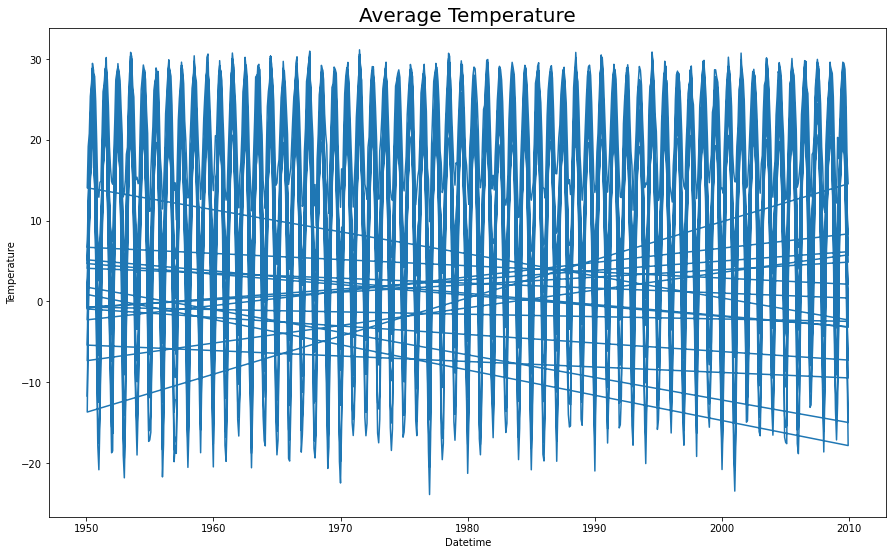

In [12]:
dates = df['dt'].values
temp = df['AverageTemperature'].values

dates = np.array(dates)
temp = np.array(temp)

plt.figure(figsize=(15,9))
plt.plot(dates, temp)

plt.title('Average Temperature', fontsize = 20)
plt.ylabel('Temperature')
plt.xlabel('Datetime')

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(temp, dates, train_size=0.8, test_size = 0.2, shuffle = False )

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Dropout

In [15]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  series = tf.expand_dims(series, axis=-1)
  ds = tf.data.Dataset.from_tensor_slices(series)
  ds = ds.window(window_size + 1, shift=1, drop_remainder = True)
  ds = ds.flat_map(lambda w: w.batch(window_size + 1))
  ds = ds.shuffle(shuffle_buffer)
  ds = ds.map(lambda w: (w[:-1], w[-1:]))
  return ds.batch(batch_size).prefetch(1)

In [16]:
tf.keras.backend.set_floatx('float64')

train_set = windowed_dataset(x_train, window_size=64, batch_size=200, shuffle_buffer=1000)
val_set = windowed_dataset(x_valid, window_size=64, batch_size=200, shuffle_buffer=1000)

model = Sequential()
model.add(Bidirectional(LSTM(60, return_sequences=True)))
model.add(Bidirectional(LSTM(60)))
model.add(Dense(30, activation="relu"))
model.add(Dense(10, activation="relu"))
model.add(Dense(1))

In [20]:
MAE = (df['AverageTemperature'].max() - df['AverageTemperature'].min())/10
print(MAE)

5.5058


In [18]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('mae')<2.4 and logs.get('val_mae')<2.4):
      print("\nMAE dari model < 10% skala data")
      self.model.stop_training = True
callbacks = myCallback()

In [ ]:
optimasi = tf.keras.optimizers.SGD(lr=1.0000e-04, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),optimizer=optimasi,metrics=["mae"])
la_histoire = model.fit(train_set, epochs=60, validation_data = val_set, callbacks=[callbacks])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/60
46/46 [==============================] - 56s 1s/step - loss: 6.6039 - mae: 7.0947 - val_loss: 6.2010 - val_mae: 6.6897
Epoch 2/60
46/46 [==============================] - 48s 1s/step - loss: 6.3091 - mae: 6.7981 - val_loss: 5.9707 - val_mae: 6.4586
Epoch 3/60
46/46 [==============================] - 48s 1s/step - loss: 5.9733 - mae: 6.4601 - val_loss: 5.5225 - val_mae: 6.0081
Epoch 4/60
46/46 [==============================] - 48s 1s/step - loss: 5.4999 - mae: 5.9852 - val_loss: 5.0011 - val_mae: 5.4825
Epoch 5/60
46/46 [==============================] - 49s 1s/step - loss: 4.9734 - mae: 5.4562 - val_loss: 4.2262 - val_mae: 4.7056
Epoch 6/60
46/46 [==============================] - 48s 1s/step - loss: 4.3037 - mae: 4.7800 - val_loss: 3.4022 - val_mae: 3.8721
Epoch 7/60
46/46 [==============================] - 48s 1s/step - loss: 3.6121 - mae: 4.0802 - val_loss: 2.5664 - val_mae: 3.0268
Epoch 8/60
46/46 [==============================] - 48s 1s/step - loss: 3.1233 - mae: 3.58